In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats.stats import pearsonr
#from scipy.stats import linregress
sns.set_style('darkgrid')
import os

### What is Regression?

Regression is a statistical method used to draw the relation between two variables. Often when data are collected there might be variables which are dependent on others. The exact relation between those variables can only be established by the regression methods. Determining this relationship helps to understand and predict the behaviour of one variable to the other.

Most common application of the regression analysis is to estimate the value of the dependent variable for a given value or range of values of the independent variables. For example, using regression we can establish the relation between the commodity price and the consumption, based on the data collected from a random sample. Regression analysis produces the regression function of a data set, which is a mathematical model that best fits to the data available. This can easily be represented by a scatter plot. Graphically, regression is equivalent to finding the best fitting curve for the give data set. The function of the curve is the regression function. Using the mathematical model, the demand of a commodity can be predicted for a given price.

Therefore, the regression analysis is widely used in predicting and forecasting. It is also used to establish relationships in experimental data, in the fields of physics, chemistry, and many natural sciences and engineering disciplines. If the relationship or the regression function is a linear function, then the process is known as a linear regression. In the scatter plot, it can be represented as a straight line. If the function is not a linear combination of the parameters, then the regression is non-linear.

In [ ]:
linregress?

### What is Correlation?

Correlation is a measure of strength of the relationship between two variables. The correlation coefficient quantifies the degree of change in one variable based on the change in the other variable. In statistics, correlation is connected to the concept of dependence, which is the statistical relationship between two variables.

The Pearsons’s correlation coefficient or just the correlation coefficient r is a value between -1 and 1 (-1≤r≤+1) . It is the most commonly used correlation coefficient and valid only for a linear relationship between the variables. If r=0, no relationship exist, and if r≥0, the relation is directly proportional; i.e. the value of one variable increases with the increase of the other. If r≤0, the relationship is inversely proportional; i.e. one variable decreases as the other increases.

Because of the linearity condition, correlation coefficient r can also be used to establish the presence of a linear relationship between the variables.

### What is the difference between Regression and Correlation?

Regression gives the form of the relationship between two random variables, and the correlation gives the degree of strength of the relationship.

Regression analysis produces a regression function, which helps to extrapolate and predict results while correlation may only provide information on what direction it may change.

The more accurate linear regression models are given by the analysis, if the correlation coefficient is higher. (|r|≥0.8)

In [ ]:
pearsonr?

$$ r = \frac{\sum (x - m_x) (y - m_y)}
             {\sqrt{\sum (x - m_x)^2 \sum (y - m_y)^2}} $$

In [34]:
length = 100
x = np.random.normal(0, 10, length)
y = x + np.random.normal(0, 4, length)

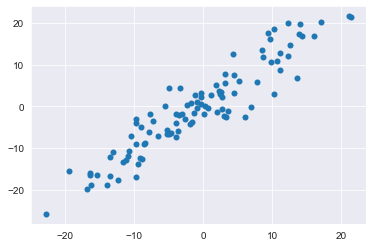

In [35]:
plt.scatter(x, y, linewidths=0.02)

In [ ]:
plt.scatter?

$$ dot(x,y) = {\sum x_i  y_i} $$
             

In [18]:
dot_ = dot_product(x, y)

In [19]:
dot_

13619.270515331082

In [40]:
np.dot(x, y) / (np.std(x)* np.std(y)) / length

0.9414655455584259

In [39]:
pearsonr(x,y)[0]

0.9367726926825404

In [42]:
pearsonr?

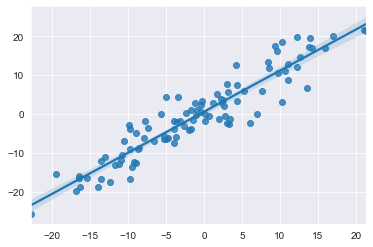

In [41]:
sns.regplot(x, y)

In [68]:
df = pd.DataFrame()

In [69]:
df['x'] = x

In [70]:
df['y'] = y

In [71]:
df

,x,y
0,10.227447,18.597625
1,10.277606,3.060849
2,-15.378828,-16.429669
3,9.605544,16.106989
4,-0.406363,0.585747
...,...,...
95,-7.866485,-6.120893
96,14.223400,16.865534
97,-0.298556,3.289955
98,13.557270,6.785438


In [48]:
df.corr()

,x,y
x,1.000000,0.936773
y,0.936773,1.000000


In [51]:
path = '../data/stock_dfs'
names = os.listdir(path)[:5]

In [55]:
names[1]

'UAL.csv'

In [63]:
os.path.join(path, names[2])

'../data/stock_dfs/TROW.csv'

In [61]:
df1 = pd.read_csv('../data/stock_dfs/UAL.csv', index_col=0)

In [75]:
df1['Open']

Date
2019-06-07    83.089996
2019-06-10    83.620003
2019-06-11    83.339996
2019-06-12    82.860001
2019-06-13    84.050003
                ...    
2020-05-14    19.719999
2020-05-15    19.670000
2020-05-18    21.790001
2020-05-19    25.620001
2020-05-20    24.379999
Name: Open, Length: 241, dtype: float64

In [66]:
df2 = pd.read_csv('../data/stock_dfs/TROW.csv', index_col=0)

In [73]:
df2.drop(['High', 'Low', 'Close', , 'Volume'], 1, inplace=True)

In [74]:
df2

,Open,Adj Close
Date,,
2019-06-07,104.250000,102.618179
2019-06-10,106.650002,103.860970
2019-06-11,107.800003,103.569687
2019-06-12,106.690002,102.783226
2019-06-13,105.470001,103.751404
...,...,...
2020-05-14,106.529999,112.570000
2020-05-15,111.320000,113.510002
2020-05-18,117.000000,117.220001


In [ ]:
names[0][:-4]

In [ ]:
main_df = pd.DataFrame()

for name in names:
    adds = os.path.join(path, name)
    df = pd.read_csv('{}'.format(adds))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close':name[:-4]}, inplace=True)
    df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')
        
print(main_df.head())
#main_df.to_csv('sp500_joined_closes.csv')

In [ ]:
sns.pairplot(main_df.head(5), kind='reg')

In [ ]:
sns.heatmap(main_df.corr(), cmap="YlGnBu")

In [ ]:
sns.pairplot?

In [ ]:
sns.heatmap?

In [ ]:
main_df.corr()['UAL'].sort_values(ascending=False)